# Backtracking Algorithm - Time Complexity Analysis

## 1. Data mining and cleaning from Sudoku game

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [6]:
df = pd.read_csv("time.txt",delim_whitespace=True, header=None)
df.head(5)

,0,1,2,3,4,5
0,Easy,0.001252,0.000003,0.001255,(,0.001249)
1,Easy,0.012582,0.000025,0.012607,(,0.012572)
2,Easy,0.002730,0.000043,0.002773,(,0.002687)
3,Easy,0.000597,0.000004,0.000601,(,0.000596)
4,Easy,0.000474,0.000007,0.000481,(,0.000475)


In [7]:
a = df[5][1].strip(")")
a

'0.012572'

In [8]:
df.drop(columns=4, inplace = True, axis = 0)
df.head(5)

,0,1,2,3,5
0,Easy,0.001252,0.000003,0.001255,0.001249)
1,Easy,0.012582,0.000025,0.012607,0.012572)
2,Easy,0.002730,0.000043,0.002773,0.002687)
3,Easy,0.000597,0.000004,0.000601,0.000596)
4,Easy,0.000474,0.000007,0.000481,0.000475)


#### Function to remove hyphens

In [9]:
def remove_hyphens(col):
    for i in range(len(col)):
        col[i] = col[i].strip(")")

In [10]:
def convert_float_number(col):
    return col.astype("float64")

In [11]:
remove_hyphens(df[5])

/var/folders/pv/zw26l23513ncd4gl52b80nkw0000gn/T/ipykernel_5076/1183593680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[i] = col[i].strip(")")


In [12]:
df.head(5)

,0,1,2,3,5
0,Easy,0.001252,0.000003,0.001255,0.001249
1,Easy,0.012582,0.000025,0.012607,0.012572
2,Easy,0.002730,0.000043,0.002773,0.002687
3,Easy,0.000597,0.000004,0.000601,0.000596
4,Easy,0.000474,0.000007,0.000481,0.000475


In [13]:
val_cols = df.columns[1:]
val_cols


Int64Index([1, 2, 3, 5], dtype='int64')

In [14]:
for col in val_cols:
    df[col] = convert_float_number(df[col])
df.head(5)

,0,1,2,3,5
0,Easy,0.001252,0.000003,0.001255,0.001249
1,Easy,0.012582,0.000025,0.012607,0.012572
2,Easy,0.002730,0.000043,0.002773,0.002687
3,Easy,0.000597,0.000004,0.000601,0.000596
4,Easy,0.000474,0.000007,0.000481,0.000475


In [15]:
df[1].dtype

dtype('float64')

In [16]:
df.columns = ['Difficulty','User',"System","Total","Real"]
df.head(5)

,Difficulty,User,System,Total,Real
0,Easy,0.001252,0.000003,0.001255,0.001249
1,Easy,0.012582,0.000025,0.012607,0.012572
2,Easy,0.002730,0.000043,0.002773,0.002687
3,Easy,0.000597,0.000004,0.000601,0.000596
4,Easy,0.000474,0.000007,0.000481,0.000475


In [17]:
df_easy = df[df["Difficulty"] == "Easy"]
df_easy.head(5)

,Difficulty,User,System,Total,Real
0,Easy,0.001252,0.000003,0.001255,0.001249
1,Easy,0.012582,0.000025,0.012607,0.012572
2,Easy,0.002730,0.000043,0.002773,0.002687
3,Easy,0.000597,0.000004,0.000601,0.000596
4,Easy,0.000474,0.000007,0.000481,0.000475


In [18]:
df_easy[['User',"System","Total","Real"]].mean()

User      0.003527
System    0.000016
Total     0.003543
Real      0.003516
dtype: float64

In [19]:
df.sort_values(by=["Difficulty"],inplace=False, axis=0, ascending=False)

,Difficulty,User,System,Total,Real
8,Hard,0.704250,0.004928,0.709178,0.702202
10,Hard,0.020075,0.000827,0.020902,0.020276
5,Hard,0.109413,0.000786,0.110199,0.108969
6,Hard,0.474747,0.003600,0.478347,0.473294
7,Hard,2.667380,0.014310,2.681690,2.661090
9,Hard,0.049569,0.000279,0.049848,0.049274
15,Expert,0.201230,0.000906,0.202136,0.200520
14,Expert,0.620825,0.002106,0.622931,0.619012
13,Expert,0.418463,0.001982,0.420445,0.416899
11,Expert,3.680232,0.021776,3.702008,3.674629


In [20]:
df_evil = df[df["Difficulty"] == "Evil"]
df_expert = df[df["Difficulty"] == "Expert"]
df_hard = df[df["Difficulty"] == "Hard"]

In [21]:
df_expert[['User','System','Total','Real']].mean()

User      0.978892
System    0.005455
Total     0.984347
Real      0.976851
dtype: float64

In [22]:
mean_evil = df_evil[['User','System','Total','Real']].mean()
mean_expert = df_expert[['User','System','Total','Real']].mean()
mean_hard = df_hard[['User','System','Total','Real']].mean()
mean_easy = df_easy[['User','System','Total','Real']].mean()

In [23]:
kind = mean_evil.index
kind

Index(['User', 'System', 'Total', 'Real'], dtype='object')

In [24]:
df["Difficulty"].unique()

array(['Easy', 'Hard', 'Expert', 'Evil'], dtype=object)

In [25]:
idx = sorted(df["Difficulty"].unique(), key=lambda x: {"Easy":1,"Hard":2,"Expert":3,"Evil":4}[x])

In [26]:
df_mean = pd.DataFrame(columns=kind,index=idx,data=[mean_easy,mean_hard,mean_expert,mean_evil])
df_mean

,User,System,Total,Real
Easy,0.003527,0.000016,0.003543,0.003516
Hard,0.670906,0.004122,0.675027,0.669184
Expert,0.978892,0.005455,0.984347,0.976851
Evil,1.688081,0.008463,1.696544,1.685094


In [27]:
df_mean.round(4)

,User,System,Total,Real
Easy,0.0035,0.0000,0.0035,0.0035
Hard,0.6709,0.0041,0.6750,0.6692
Expert,0.9789,0.0055,0.9843,0.9769
Evil,1.6881,0.0085,1.6965,1.6851


In [28]:
df_mean.sort_values(by=["Real"], ascending = True, axis=0,inplace=True)
df_mean

,User,System,Total,Real
Easy,0.003527,0.000016,0.003543,0.003516
Hard,0.670906,0.004122,0.675027,0.669184
Expert,0.978892,0.005455,0.984347,0.976851
Evil,1.688081,0.008463,1.696544,1.685094


In [29]:
df.groupby(["Difficulty"])["Real"].mean()

Difficulty
Easy      0.003516
Evil      1.685094
Expert    0.976851
Hard      0.669184
Name: Real, dtype: float64

In [30]:
df.groupby(["Difficulty"])["Real"].min()

Difficulty
Easy      0.000475
Evil      0.165149
Expert    0.094428
Hard      0.020276
Name: Real, dtype: float64

In [31]:
df.groupby(["Difficulty"])["Real"].max()

Difficulty
Easy      0.012572
Evil      6.823595
Expert    3.674629
Hard      2.661090
Name: Real, dtype: float64

In [32]:
min = df.groupby(["Difficulty"])["Real"].min()
mean = df.groupby(["Difficulty"])["Real"].mean()
df.groupby(["Difficulty"])["Real"].max()
max = df.groupby(["Difficulty"])["Real"].max()

In [33]:
df3 = pd.DataFrame(data=[min,mean,max],index=["Best","Average","Worst"])
df3

Difficulty,Easy,Evil,Expert,Hard
Best,0.000475,0.165149,0.094428,0.020276
Average,0.003516,1.685094,0.976851,0.669184
Worst,0.012572,6.823595,3.674629,2.661090


In [34]:
df3.index.name = "Complexity"

In [35]:
df3

Difficulty,Easy,Evil,Expert,Hard
Complexity,,,,
Best,0.000475,0.165149,0.094428,0.020276
Average,0.003516,1.685094,0.976851,0.669184
Worst,0.012572,6.823595,3.674629,2.661090


## 2. Time Complexity Visualization

#### a. Time Complexity of Different Cases

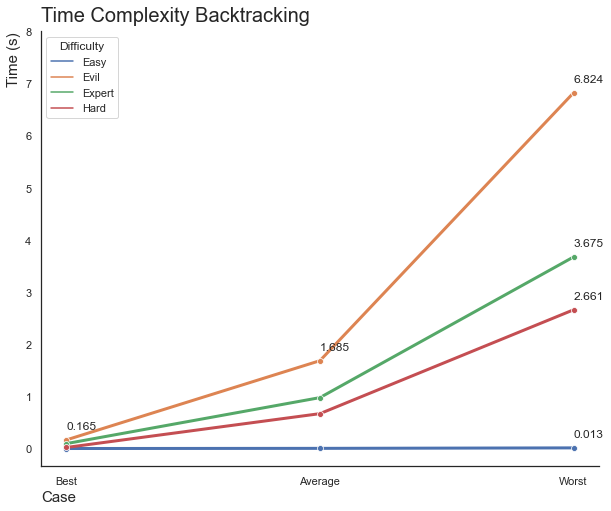

In [38]:
custom_params = {"axes.spines.right":False, "axes.spines.top":False}
a = sn.color_palette("mako_r", 6)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
sn.set_theme(rc= custom_params, style="white")
p = sn.lineplot(data =df3,marker="o",dashes=False,linewidth=3,legend="full")
p.set_xlabel(xlabel="Case",fontsize = 15,loc="left")
p.set_ylabel(ylabel="Time (s)", fontsize = 15, loc="top")
p.set_title("Time Complexity Backtracking", fontsize = 20, loc="left",pad=10)
p.set_ylim(top=8.0)
for idx,num in enumerate(df3["Evil"]):
    plt.annotate(round(num,3),(df3.index[idx],float(df3["Evil"][idx])+0.2))
plt.annotate(round(df3["Expert"]["Worst"],3),("Worst",float(df3["Expert"]["Worst"]+0.2)))
plt.annotate(round(df3["Easy"]["Worst"],3),("Worst",float(df3["Easy"]["Worst"]+0.2)))
plt.annotate(round(df3["Hard"]["Worst"],3),("Worst",float(df3["Hard"]["Worst"]+0.2)))
plt.savefig("./image/complexity_visulization.png")


#### b. Average Time Visualization

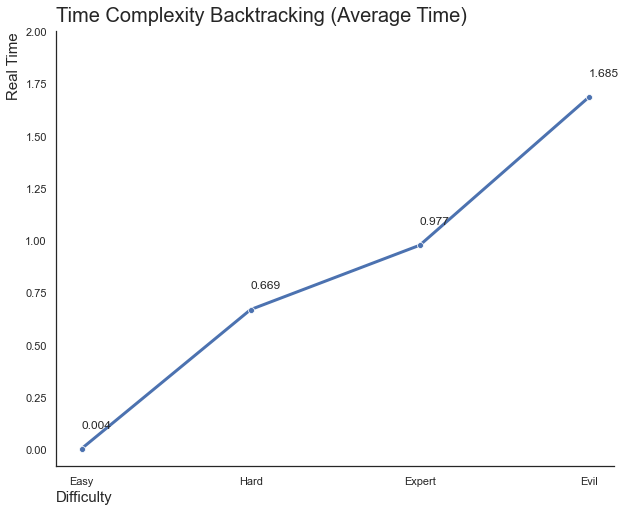

In [39]:
custom_params = {"axes.spines.right":False, "axes.spines.top":False}
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
sn.set_theme(rc= custom_params, style="white")
p = sn.lineplot(data = df_mean['Real'],marker="o",dashes=False, linewidth=3,palette=["lightblue"])
p.set_xlabel(xlabel="Difficulty",fontsize = 15,loc="left")
p.set_ylabel(ylabel="Real Time", fontsize = 15, loc="top")
p.set_title("Time Complexity Backtracking (Average Time)", fontsize = 20, loc="left",pad=10)
p.set_ylim(top=2.0)
for idx,num in enumerate(df_mean["Real"]):
    plt.annotate(round(num,3),(df_mean.index[idx],float(df_mean["Real"][idx])+0.1))
plt.savefig("./image/time_complexity_mean.png")